In [11]:
import sys
sys.path.append("/Users/ruby/Astro/rlb_LWA/LWA_data_preprocessing")
import LWA_preprocessing
import pyuvdata
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ms_filepath = "/Users/ruby/Astro/LWA_data/LWA_data_20220307/20220307_175923_61MHz.ms"
uvd = LWA_preprocessing.convert_raw_ms_to_uvdata(ms_filepath)

Reading data file /Users/ruby/Astro/LWA_data/LWA_data_20220307/20220307_175923_61MHz.ms


UVW orientation appears to be flipped, attempting to fix by changing conjugation of baselines.


In [5]:
uvd.antenna_positions

array([[ -77.58718393,  195.97301919,  181.0624559 ],
       [ 132.21747904,  513.0924913 ,  680.06982166],
       [ -85.7437917 ,  250.65786139,  239.86802468],
       ...,
       [-383.02361166,  739.13407345,  620.74308863],
       [-849.99377582,  233.68911558, -259.20144284],
       [ -74.16303306,  -57.59072466, -112.93939236]])

In [7]:
# get antennas positions in ECEF
antpos = uvd.antenna_positions + uvd.telescope_location

# convert to topocentric (East, North, Up or ENU) coords.
antpos = pyuvdata.utils.ENU_from_ECEF(antpos, *uvd.telescope_location_lat_lon_alt)

In [21]:
print(np.median(antpos[:,0]))
print(np.median(antpos[:,1]))

89.00137195079
-61.60983453044766


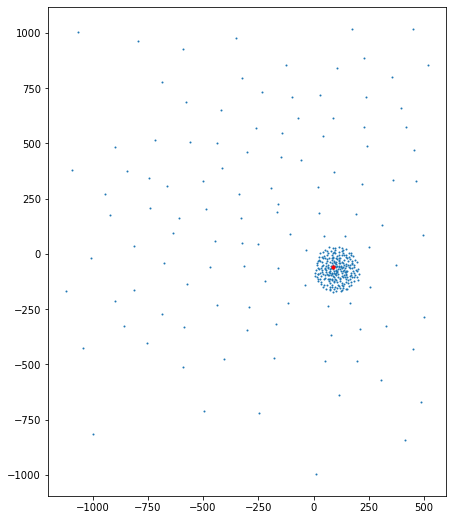

In [34]:
plt.figure(figsize=(9,9))
plt.scatter(antpos[:, 0], antpos[:, 1], s=1)
plt.scatter(np.median(antpos[:,0]), np.median(antpos[:,1]), color="red", s=10)
plt.gca().set_aspect("equal")
plt.show()

In [58]:
core_ants = np.where(
    np.sqrt((antpos[:,0]-np.median(antpos[:,0]))**2. + (antpos[:,1]-np.median(antpos[:,1]))**2.) < 130.
)[0]
outrigger_ants = np.where(
    np.sqrt((antpos[:,0]-np.median(antpos[:,0]))**2. + (antpos[:,1]-np.median(antpos[:,1]))**2.) > 130.
)[0]

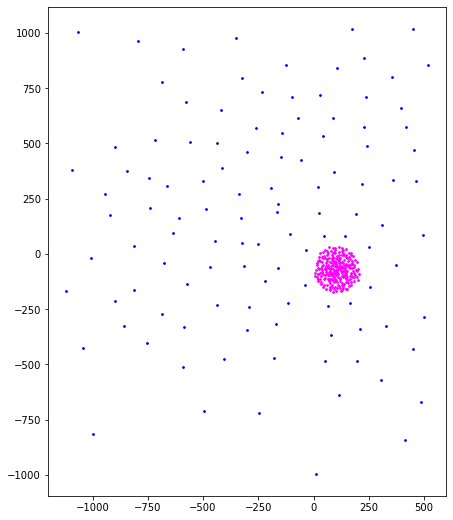

In [62]:
plt.figure(figsize=(9,9))
plt.scatter(antpos[outrigger_ants, 0], antpos[outrigger_ants, 1], s=3, color="blue")
plt.scatter(antpos[core_ants, 0], antpos[core_ants, 1], s=3, color="magenta")
plt.gca().set_aspect("equal")
plt.show()

In [66]:
for ant in outrigger_ants:
    ant_1_bls = np.where(uvd.ant_1_array == ant)[0]
    if len(ant_1_bls) > 0:
        uvd.flag_array[ant_1_bls, :, :, :] = True
    ant_2_bls = np.where(uvd.ant_2_array == ant)[0]
    if len(ant_2_bls) > 0:
        uvd.flag_array[ant_2_bls, :, :, :] = True